In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn import svm

import matplotlib.pyplot as plt
from six import StringIO 
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
import seaborn as sns

In [3]:
df= pd.read_csv("datasets/bank-full.csv")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
temp= df.columns.values[0]


In [6]:
temp

'age'

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

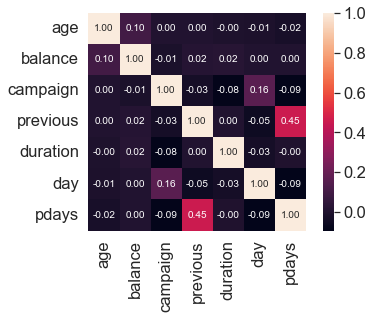

In [9]:
corrmat = df.corr()
k=18 #no of variables for heatmap
cols= corrmat.nlargest(k, 'age')['age'].index
cm= np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
heatmap= sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size' :10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:>

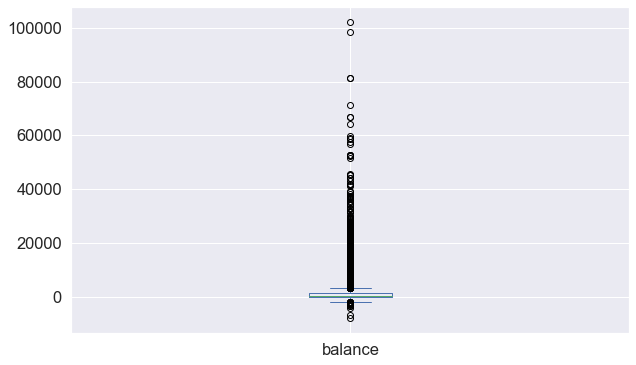

In [10]:
plt.figure(figsize= (10,6))
df.balance.plot(kind='box')

In [11]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [12]:
df.drop(df[df['balance']>1428].index, axis=0, inplace=True)  #to remove outlier

In [13]:
df.drop(df[df['balance']<72].index, axis=0, inplace=True)

In [14]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


<AxesSubplot:>

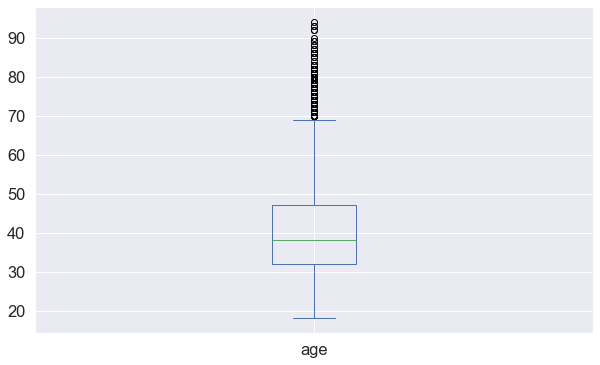

In [15]:
plt.figure(figsize=(10,6))
df.age.plot(kind='box')

In [16]:
df['age'].describe()

count    22636.000000
mean        40.264888
std         10.418085
min         18.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         94.000000
Name: age, dtype: float64

In [17]:
df.drop(df[df['age']<32].index, axis=0, inplace=True)

In [18]:
df.drop(df[df['age']>48].index, axis=0, inplace=True)

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
26,39,management,single,tertiary,no,255,yes,no,unknown,5,may,296,1,-1,0,unknown,no
29,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


<AxesSubplot:>

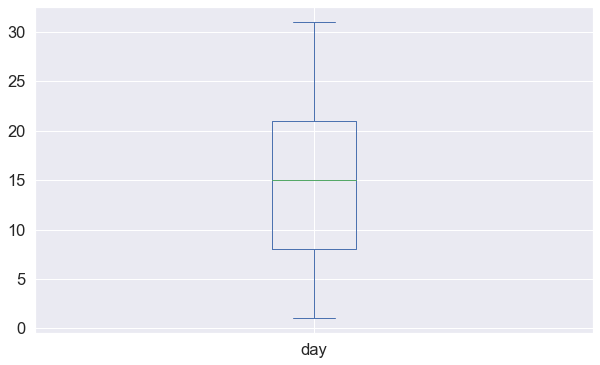

In [21]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [22]:
df['day'].describe()

count    12570.000000
mean        15.428003
std          8.253402
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [23]:
df.drop(df[df['day']<8].index, axis=0, inplace=True)

In [24]:
df.drop(df[df['day']>21].index, axis=0, inplace=True)

In [25]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1156,48,technician,married,secondary,no,720,yes,no,unknown,8,may,177,3,-1,0,unknown,no
1163,32,admin.,single,secondary,no,89,yes,yes,unknown,8,may,308,3,-1,0,unknown,no
1165,32,management,single,tertiary,no,111,yes,no,unknown,8,may,162,2,-1,0,unknown,no
1170,41,blue-collar,married,primary,no,191,yes,no,unknown,8,may,67,1,-1,0,unknown,no
1174,36,technician,married,secondary,no,83,yes,no,unknown,8,may,178,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,188,3,success,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


<AxesSubplot:>

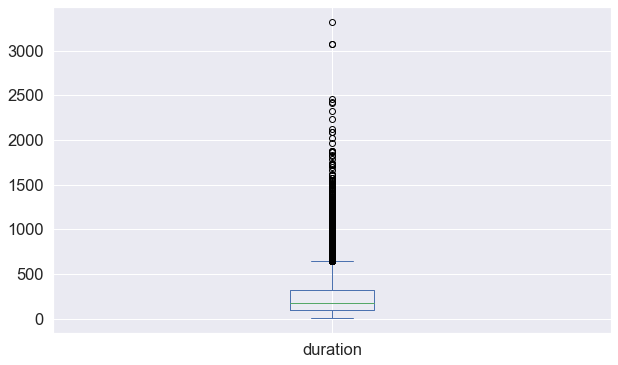

In [26]:
plt.figure(figsize= (10,6))
df.duration.plot(kind='box')

In [27]:
df['duration'].describe()

count    6895.000000
mean      259.054677
std       269.793730
min         2.000000
25%        99.000000
50%       178.000000
75%       316.000000
max      3322.000000
Name: duration, dtype: float64

In [28]:
df.drop(df[df['duration']<323].index, axis=0, inplace=True)

In [29]:
df.drop(df[df['duration']<101].index, axis=0, inplace=True)

In [30]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1190,33,blue-collar,divorced,primary,no,176,yes,no,unknown,8,may,622,1,-1,0,unknown,no
1194,43,management,married,tertiary,no,870,yes,yes,unknown,8,may,528,1,-1,0,unknown,no
1200,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes
1207,44,housemaid,married,secondary,no,281,yes,no,unknown,8,may,604,1,-1,0,unknown,no
1230,48,technician,divorced,secondary,no,177,yes,no,unknown,8,may,471,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45178,34,blue-collar,married,secondary,no,320,yes,no,cellular,12,nov,413,1,92,3,success,yes
45182,34,technician,married,secondary,no,133,no,no,cellular,15,nov,401,2,187,5,success,yes
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no


<AxesSubplot:>

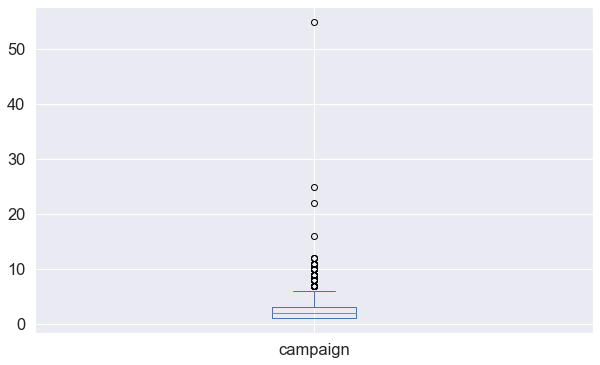

In [31]:
plt.figure(figsize= (10,6))
df.campaign.plot(kind='box')

In [32]:
df['campaign'].describe()

count    1668.000000
mean        2.426259
std         2.324581
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: campaign, dtype: float64

In [33]:
df.drop(df[df['campaign']<3].index, axis=0, inplace=True)

In [34]:
#Here 25% is 1 ...so don't remove it

In [35]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1200,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes
1434,34,blue-collar,married,secondary,no,199,yes,no,unknown,8,may,627,3,-1,0,unknown,no
1483,34,management,married,tertiary,no,76,no,no,unknown,8,may,335,9,-1,0,unknown,no
1516,40,admin.,single,secondary,no,118,yes,no,unknown,8,may,383,3,-1,0,unknown,no
1554,42,self-employed,married,secondary,no,106,yes,no,unknown,8,may,515,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44811,39,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,unknown,yes
45031,42,unemployed,married,secondary,no,1289,no,no,cellular,15,oct,1176,3,92,6,success,yes
45058,36,technician,married,tertiary,no,521,no,no,cellular,20,oct,347,3,-1,0,unknown,yes
45081,34,technician,single,secondary,no,1279,yes,no,cellular,21,oct,339,3,91,10,success,yes


<AxesSubplot:>

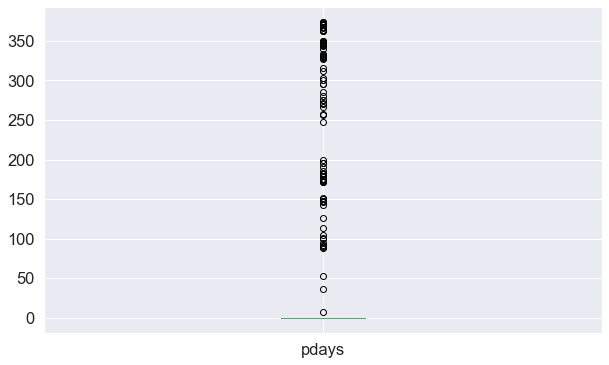

In [36]:
plt.figure(figsize= (10,6))
df.pdays.plot(kind='box')

In [37]:
df['pdays'].describe() # 75% and 25% same value so not deleted anything

count    528.000000
mean      40.020833
std      101.410814
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -1.000000
max      374.000000
Name: pdays, dtype: float64

<AxesSubplot:>

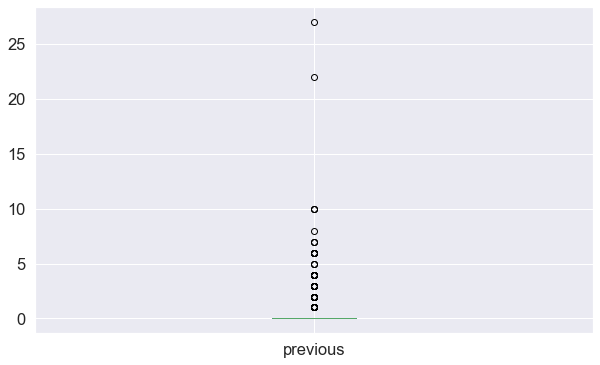

In [38]:
plt.figure(figsize= (10,6))
df.previous.plot(kind='box')

In [39]:
df['previous'].describe()

count    528.000000
mean       0.619318
std        2.099283
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       27.000000
Name: previous, dtype: float64

In [40]:
df.drop(df[df['previous']<0].index, axis=0, inplace=True)

In [41]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1200,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes
1434,34,blue-collar,married,secondary,no,199,yes,no,unknown,8,may,627,3,-1,0,unknown,no
1483,34,management,married,tertiary,no,76,no,no,unknown,8,may,335,9,-1,0,unknown,no
1516,40,admin.,single,secondary,no,118,yes,no,unknown,8,may,383,3,-1,0,unknown,no
1554,42,self-employed,married,secondary,no,106,yes,no,unknown,8,may,515,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44811,39,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,unknown,yes
45031,42,unemployed,married,secondary,no,1289,no,no,cellular,15,oct,1176,3,92,6,success,yes
45058,36,technician,married,tertiary,no,521,no,no,cellular,20,oct,347,3,-1,0,unknown,yes
45081,34,technician,single,secondary,no,1279,yes,no,cellular,21,oct,339,3,91,10,success,yes


In [42]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1200,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes
1434,34,blue-collar,married,secondary,no,199,yes,no,unknown,8,may,627,3,-1,0,unknown,no
1483,34,management,married,tertiary,no,76,no,no,unknown,8,may,335,9,-1,0,unknown,no
1516,40,admin.,single,secondary,no,118,yes,no,unknown,8,may,383,3,-1,0,unknown,no
1554,42,self-employed,married,secondary,no,106,yes,no,unknown,8,may,515,3,-1,0,unknown,no


In [43]:
def preprocessor(df): 
    res_df = df.copy()
    le = preprocessing.LabelEncoder() 
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education']) 
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact']= le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['job'])
    res_df['Target']=le.fit_transform(res_df['job']) 
    return res_df

In [44]:
encoded_df =preprocessor(df)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
1200,32,1,2,0,0,611,1,0,2,8,7,541,3,-1,0,1,1
1434,34,1,1,1,0,199,1,0,2,8,7,627,3,-1,0,1,1
1483,34,4,1,2,0,76,0,0,2,8,7,335,9,-1,0,4,4
1516,40,0,2,1,0,118,1,0,2,8,7,383,3,-1,0,0,0
1554,42,6,1,1,0,106,1,0,2,8,7,515,3,-1,0,6,6


In [45]:
x= encoded_df.drop('Target', axis=1).values
y= encoded_df['Target'].values

In [46]:
#split data into train and test datasets
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [47]:
# decision tree with depth 2
model_dt_2 =DecisionTreeClassifier(random_state=1, max_depth=2)

model_dt_2.fit(x_train, y_train)

model_dt_2_score_train =model_dt_2.score(x_train, y_train)

model_dt_2_score_test =model_dt_2.score(x_test, y_test)

print("training score", model_dt_2_score_train)

print("testing score", model_dt_2_score_test)


training score 0.7511848341232228
testing score 0.7547169811320755


In [48]:
# decision tree with depth 4

model_dt_4 =DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train =model_dt_4.score(x_train, y_train)
model_dt_4_score_test =model_dt_4.score(x_test, y_test)
print("training score", model_dt_4_score_train)
print("testing score", model_dt_4_score_test)


training score 0.985781990521327
testing score 0.9905660377358491


In [49]:

# decision tree with depth 6
model_dt_6 =DecisionTreeClassifier(random_state=1, max_depth=6)
model_dt_6.fit(x_train, y_train)
model_dt_6_score_train =model_dt_6.score(x_train, y_train)
model_dt_6_score_test =model_dt_6.score(x_test, y_test)
print("training score", model_dt_6_score_train)
print("testing score", model_dt_6_score_test)


training score 1.0
testing score 1.0


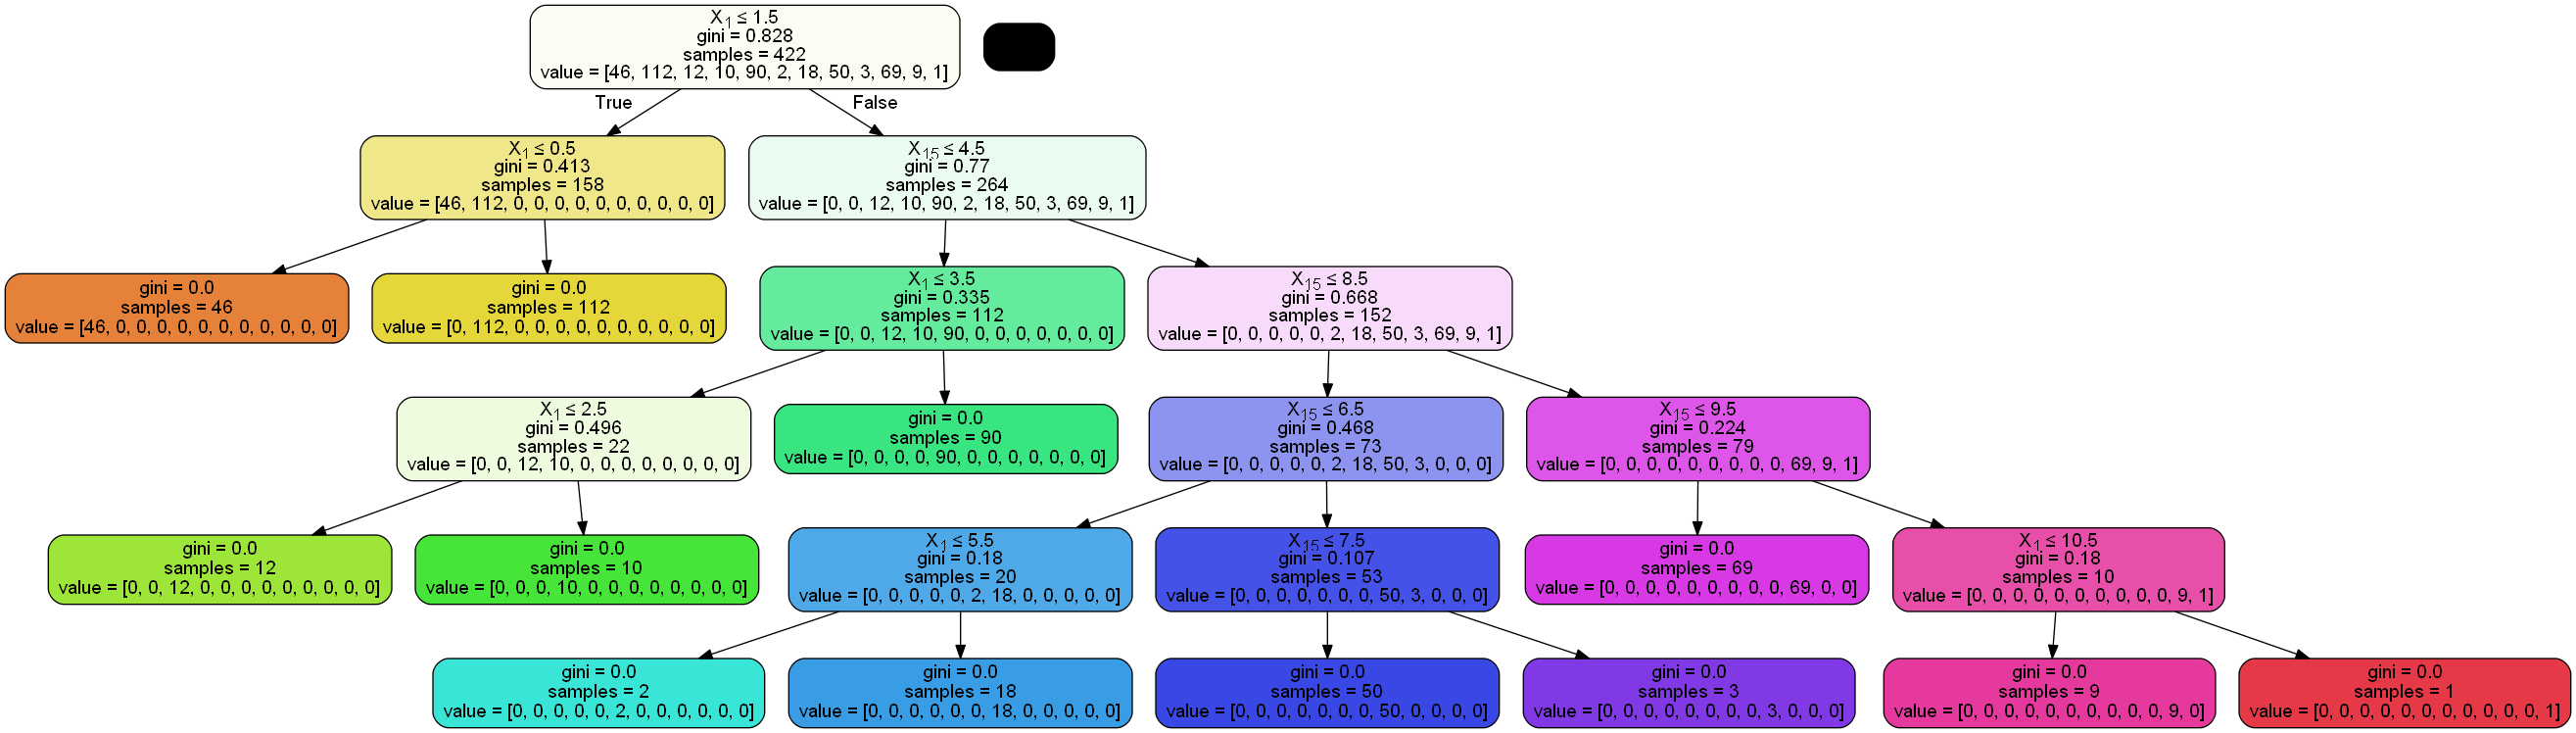

<Figure size 720x1440 with 0 Axes>

In [50]:
#for checking overfitting and underfitting 
#test lesser..... train greater......data is overfitted
plt.figure(figsize=(10,20))
dot_data= StringIO()
export_graphviz(model_dt_6, out_file=dot_data, filled=True, rounded=True, special_characters=True) 
graph= pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

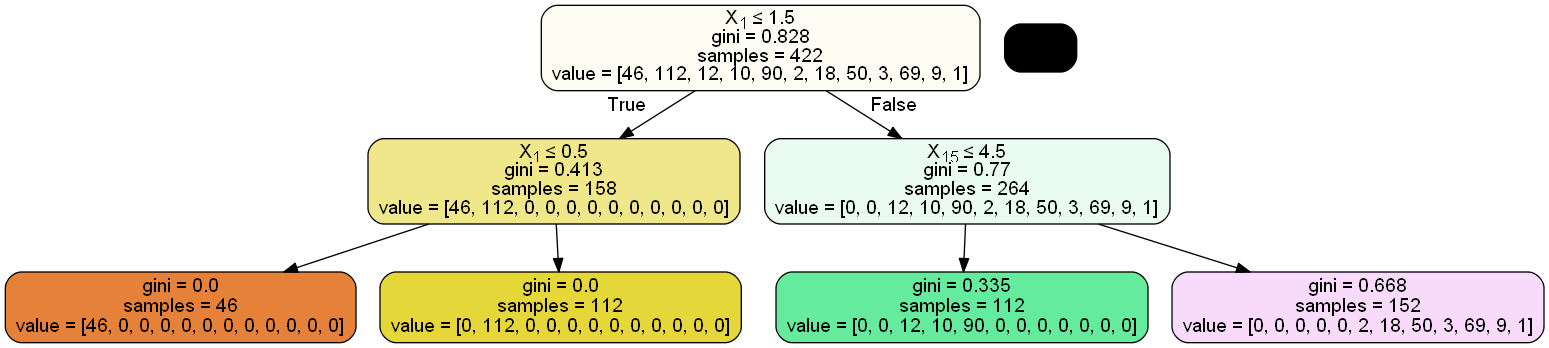

<Figure size 720x1440 with 0 Axes>

In [51]:
plt.figure(figsize=(10,20))
dot_data= StringIO()
export_graphviz(model_dt_2, out_file=dot_data, filled=True, rounded=True, special_characters=True) 
graph= pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())